# This is a graph of Annual Global Average Temperature 

Code is by no means optimal.

First step is to dowload the raw data from: [the Met Office](https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/download.html)

The data used here is the HadCRUT.5.0.1.0 'Global (NH+SH)/2' Annual data in CSV format. 

In [1]:

# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Data

#df = pd.read_excel ('tempdata3.xlsx')    #r'C:\Users\danho\
df_temps = pd.read_csv('tempdata3.csv')
#df2=pd.read_csv('hadcut_monthly.csv')


The next step is to add reference numbers and calculate the rolling average at a range of time scales.

In [2]:
# Add Preindustrial and Paris Agreement Targets

#df_temps['paris1_5'] = np.full((173,1),1.5)
#df_temps['paris2_0'] = np.full((173,1),2.0)
#df_temps['preind'] = np.full((173,1),0)

temps_years = df_temps['Year']
temps = df_temps['HadCRUT5 (degC)']
#paris1_5 = df_temps['paris1_5']
#paris2_0 = df_temps['paris2_0']
#preind = df_temps['preind']

# Calculate rolling mean

#df['rolling_temps_10']=df['HadCRUT5 (degC)'].rolling(10).mean()
#tenyearav = df['rolling_temps_10']
#df['rolling_temps_30']=df['HadCRUT5 (degC)'].rolling(20).mean()
#thirtyyearav = df['rolling_temps_30']

df_temps['rolling_temps_10_centred']=df_temps['HadCRUT5 (degC)'].rolling(10,center=True).mean()
tenyearav_centred = df_temps['rolling_temps_10_centred']
df_temps['rolling_temps_20_centred']=df_temps['HadCRUT5 (degC)'].rolling(20,center=True).mean()
twentyyearav_centred = df_temps['rolling_temps_20_centred']


Things to add to the dataset:
- Easy to read column titles



Final step is to make a figure including all the data.

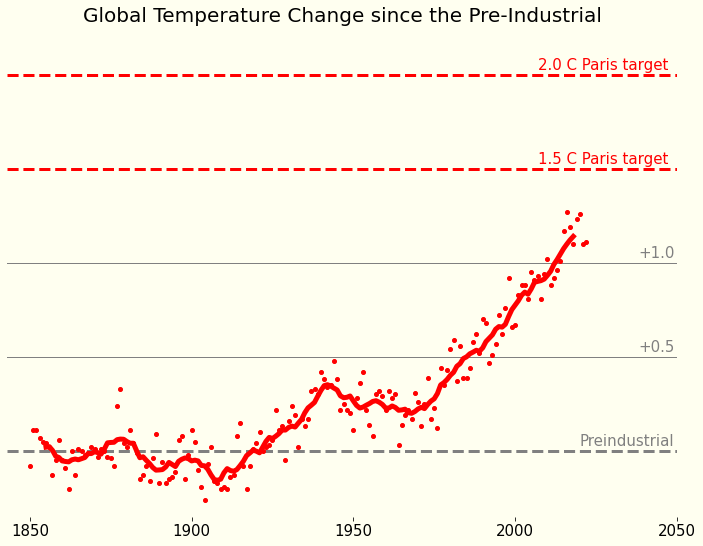

In [10]:
# plot data
fig, ax = plt.subplots()

plt.axhline(y = 0.0 ,color='grey', linestyle='--', linewidth=3)
plt.axhline(y = 1.5 ,color='red', linestyle='--', linewidth=3)
plt.axhline(y = 2.0, color='red', linestyle='--', linewidth=3)
plt.axhline(y = 0.5, color='grey', linestyle='-', linewidth=1)
plt.axhline(y = 1.0, color='grey', linestyle='-', linewidth=1)

#ax.plot(temps_years,paris1_5,color='black',linestyle='--',label='_nolegend_')
#ax.plot(temps_years,paris2_0,color='black',linestyle='--',label='_nolegend_')
#ax.plot(temps_years,preind,color='grey',linestyle='--',label='_nolegend_')

ax.plot(temps_years,temps,'ro',markersize=4,label='Annual Average')      #linewidth=0.8
#ax.plot(years,tenyearav,'r-',linewidth=2)
#ax.plot(years,thirtyyearav,'r-',linewidth=4,label='20 Year Rolling Average')
ax.set_title('Global Temperature Change since the Pre-Industrial',fontsize=20)

#ax.set_xlabel('Year',fontsize=15)
#ax.set_ylabel('Temperature Anomaly (C)',fontsize=15)

ax.plot(temps_years,tenyearav_centred,'r-',linewidth=5,label='10 Year Rolling Average')
#ax.plot(years,twentyyearav_centred,'r-',linewidth=4,label='20 Year Rolling Average')

plt.xlim([1848,2050])
plt.xticks([1850,1900,1950,2000,2050],fontsize=15)

plt.ylim([-0.35, 2.25])

#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")

#ax.legend(edgecolor='white')
#plt.legend()

plt.text(2038,0.53,'+0.5',fontsize=15,color='grey')
plt.text(2038,1.03,'+1.0',fontsize=15,color='grey')
plt.text(2020,0.03,'Preindustrial',fontsize=15,color='grey')
plt.text(2007,1.53,'1.5 C Paris target',fontsize=15,color='red')
plt.text(2007,2.03,'2.0 C Paris target',fontsize=15,color='red')


ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
#ax.set_facecolor('black')
fig.patch.set_facecolor('ivory')

plt.gcf().set_size_inches(12,9)
plt.savefig('Temperature Figure 1.png', bbox_inches='tight', pad_inches=1)


*Things to add to figure:*
- Uncertainty on individual years
- Uncertainty on rolling average
- Label for most recent temperatures for individual year and rolling average

# Monthly Data

Now we get the monthly data.

In [4]:
df2=pd.read_csv('hadcut_monthly.csv')

#df2['time_useful']=

# Resources:

Annual Global Aberage Temperature reports by:
- [Met Office](https://www.metoffice.gov.uk/about-us/press-office/news/weather-and-climate/2022/2021-hadcrut5-wmo-temperature-statement)
- [Berkley Earth](http://berkeleyearth.org/global-temperature-report-for-2021/)
- [WMO](https://library.wmo.int/index.php?lvl=notice_display&id=97#.YmmhRdrMKUk)


Monthly Reports:
- [ECMWF](https://climate.copernicus.eu/climate-bulletins#fff0490f-9b0c-4f51-8faf-453f6d751f14)

